In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../part3_logistic_regression/Social_Network_Ads.csv')
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


(None,
     User ID  Gender   Age  EstimatedSalary  Purchased
 0  15624510    Male  19.0          19000.0          0
 1  15810944    Male  35.0          20000.0          0
 2  15668575  Female  26.0          43000.0          0
 3  15603246  Female  27.0          57000.0          0
 4  15804002    Male  19.0          76000.0          0)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.naive_bayes import GaussianNB

classfier = GaussianNB().fit(x_train, y_train)
classfier.score(x_train, y_train)

0.884375

In [5]:
y_pred = classfier.predict(x_test)

classfier.score(x_test, y_test)

0.9125

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


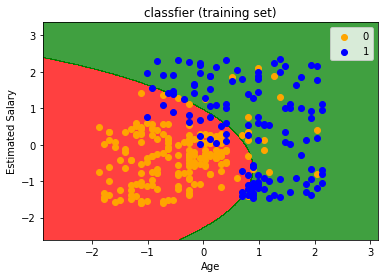

In [8]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
# 產生 x y 網格座標
x1, x2 = np.meshgrid(
                      np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                      np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01),
                    )
# ravel 變成一維
# ravel not copy, flatten copy, squeeze 只對axis=1降維, reshape(-1)
plt.contourf(x1, x2, classfier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)

plt.title('classfier (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


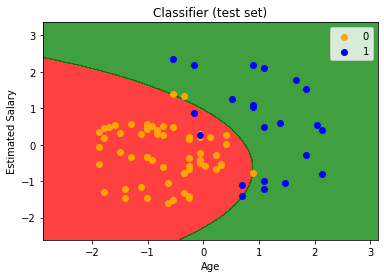

In [9]:
x_test_set, y_test_set = x_test, y_test
x1, x2 = np.meshgrid(
                      np.arange(start=x_test_set[:, 0].min() - 1, stop=x_test_set[:, 0].max() + 1, step=0.01),
                      np.arange(start=x_test_set[:, 1].min() - 1, stop=x_test_set[:, 1].max() + 1, step=0.01),
                    )
plt.contourf(x1, x2, classfier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test_set)):
    plt.scatter(x_test_set[y_test_set == j, 0], x_test_set[y_test_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)

plt.title('Classifier (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()